# TPD 9 K-Means

## Exercise 1

1. Is this data linearly separable?
2. If it is possible, give a line that separates this data into two classes.
3. Apply the K-means algorithm on the input data (x1 and x2) assuming the initial centers are
at (0,-4) and (0,8).
4. Let us define the distortion function J as: $J(c,\mu) = \sum^m_{i=1} \lVert x^{(i)}-\mu_{c^{(i)}}\rVert^2$ , where m is the i=1 number of training examples, $x^{(i)}$ is the i-th training example, $c=\{ c^{(1)}, ..., c^{(m)}\}$ is the set of assigned classes for each training example, $\mu = \{ \mu_1, ..., \mu_k \}$ is the set of cluster centroïds and k is the given fixed number of classes prior to executing K-means. Compute J when the initial centers are at (0,-4) and (0,8) for the given inputs, before applying the K- Means and for each iteration of the K-Means. What does this function J measure ?
5. Suppose you are given a 24-bit RGB image of size 256 by 256. How can you use K-means to compress this image into a 16-color image ? What is the compression rate of the obtained image ?

In [1]:
import pandas as pd

data = pd.read_csv('./TD9-kmeans.csv', header=[0])

data.head()

,x1,x2,class
0,1.0,10.0,1
1,1.5,2.0,2
2,1.0,6.0,1
3,2.0,1.5,2
4,2.0,10.0,1


## Question 1

Oui les données sont linéairement séparables.

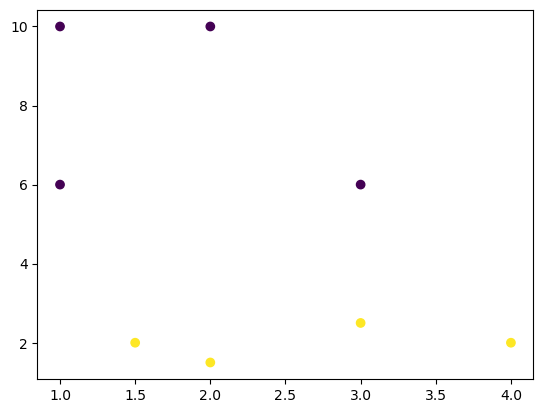

In [2]:
import matplotlib.pyplot as plt

# Si la class est 1 afficher en vert si 2 en rouge

plt.scatter(data['x1'], data['x2'], c=data['class'])
plt.show()

## Question 2

On peut séparer avec une droite de la forme $x_2 = 0 \times x_1 + 4$.

## Question 3

Apply the K-means algorithm on the input data (x1 and x2) assuming the initial centers are
at (0,-4) and (0,8).

**Initialisation:**
- choose a value for k
- choose k cluster centers randomly or from the datapoints

**Learning:**
- Repeat
    - For each datapoint x
        - Compute the distance to each cluster
        - Assign the datapoint to the nearest cluster center
    - For each cluster center
        - Move the position of the center to the mean of the points in that cluster
- Until the cluster centers stop moving

**Usage:**
- For each test point
- Compute the distance to each cluster
- Assign the datapoint to the nearest cluster center

In [3]:
# Initialisation

import numpy as np

k = 2
c = np.array([[0, -4], [0, 8]])

In [4]:
# Learning

def distance(x, c):
    # distance entre le point x et les centres c
    return np.array([np.linalg.norm(x - c[i], axis=1) for i in range(k)]).T


def assign(x, c):
    return np.argmin(distance(x, c), axis=1)


def move(x, c):
    return np.array([np.mean(x[c == i], axis=0) for i in range(k)])

1. distance(x, c) : Cette fonction calcule la distance entre un ensemble de points x et un ensemble de centres c. Ici, x représente les points de données et c représente les centres de clusters. La fonction utilise np.linalg.norm pour calculer la norme (ou la distance euclidienne) entre chaque point et chaque centre de cluster. Le résultat est une matrice de distances où chaque ligne représente un point de données et chaque colonne représente la distance à un centre de cluster.
2. assign(x, c) : Après avoir calculé la matrice des distances entre les points de données et les centres de clusters avec la fonction distance, assign utilise np.argmin pour trouver l'indice du centre de cluster le plus proche pour chaque point de données. Cela attribue chaque point de données au cluster le plus proche en retournant un tableau d'indices de clusters.
3. move(x, c) : Cette fonction est utilisée pour recalculer les positions des centres de clusters après que tous les points de données ont été assignés à des clusters. Pour chaque cluster, elle calcule la moyenne des points qui lui ont été assignés (x[c == i] sélectionne tous les points de données assignés au cluster i), et cette moyenne devient la nouvelle position du centre de cluster.

In [5]:
# Algorithme 

history_move = []


def diff(c1, c2):
    return np.linalg.norm(c1 - c2)


compte = 0

while len(history_move) < 2 or diff(history_move[-1], history_move[-2]) > 0.000001:
    c = move(data[['x1', 'x2']].values, assign(data[['x1', 'x2']].values, c))
    history_move.append(c)
    compte += 1

print(c)
print(compte)

[[2.625 2.   ]
 [1.75  8.   ]]
3


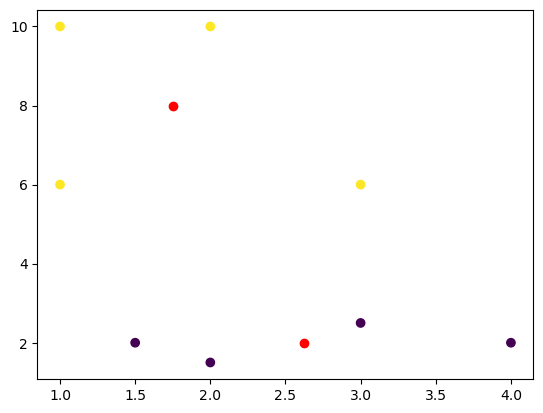

In [6]:
# Plot

plt.scatter(data['x1'], data['x2'], c=assign(data[['x1', 'x2']].values, c))
plt.scatter(c[:, 0], c[:, 1], c='red')
plt.show()

## Question 4

In [7]:
def J(x, c):
    return np.sum(np.linalg.norm(x - c[assign(x, c)],
                                 axis=1) ** 2)  # calcul de la distance entre les points et les centres, c[assign(x, c)] permet de récupérer les centres associés aux points


for i in range(len(history_move)):
    print(J(data[['x1', 'x2']].values, history_move[i]))

28.201111111111103
22.937499999999996
22.937499999999996


What does this function J measure ?

La fonction J mesure la somme de la distance entre les points et les centres.

## Question 5

### Compression d'image avec K-means

Pour compresser une image RGB 24 bits de taille 256x256 en une image à 16 couleurs en utilisant K-means :

#### Étapes :
1. **Redimensionnement des données de l'image** : Convertir l'image en une liste de pixels en valeurs RGB.
2. **Application de K-means** : Appliquer K-means avec `k=16` pour trouver les 16 couleurs.
3. **Remplacement des pixels** : Remplacer chaque pixel par la couleur du centre de cluster le plus proche.
4. **Reconstruction de l'image** : Reconstruire l'image avec la nouvelle palette de couleurs.

#### Calcul du taux de compression :
- **Taille originale** : $ 256 \times 256 \times 24 = 1572864$ bits
- **Nombre de bits pour coder les 16 couleurs** : $log_2(16)=4$
- **Taille compressée** : $ 256 \times 256 \times 4 = 262144$ bits
- **Taux de compression** : $ \frac{Taille \ originale}{Taille \ compressee} = \frac{256 \times 256 \times 24}{256 \times 256 \times 4} = \frac{24}{4} = 6 $

La taille de l'image est réduite par un facteur de 6.


## Exercise #2: Self-Organizing Map (bonus)

1. Apply 3 iterations of the SOM algorithm to the following data:
The circles are the inputs (at coordinates (5,2), (3,3) and (-1,-2)) and the squares are the two interconnected neurons (at coordinates (-5,0) and (5,0)). Interconnected means they are neighbours from each other. We assume that the learning rates are constant. The learning rate of the winning neuron is equal to 0.5 and the learning rate of the neighbour neuron is equal to 0.1.
2. Program the SOM algorithm in order to find the best possible clustering for the following data consisting of 20 random points:

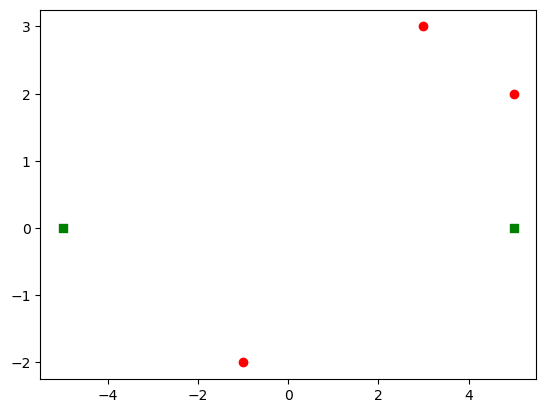

In [8]:
# Plot data circles and squares

import matplotlib.pyplot as plt

circle = np.array([[5, 2], [3, 3], [-1, -2]])
square = np.array([[-5, 0], [5, 0]])

plt.scatter(circle[:, 0], circle[:, 1], c='red')
plt.scatter(square[:, 0], square[:, 1], c='green', marker='s')

## Question 1

Apply 3 iterations of the SOM algorithm to the following data:

**Initialisation:**
- Choose a size (number of neurons) and number of dimensions d for the map
- Either:
    - Choose random values for the weight vectors so that they are all different OR
    - Set the weight values to increase in the direction of the first d principal components (next section) of the dataset

**Learning:**
- Repeat
    - For each datapoint:
        - Select the best-matching neuron nb using the minimum Euclidean distance between the weights and the input
        - Update the weight vector of the best-matching node using:
        - Update the weight vector of all other neurons using:
        - Reduce the learning rates and adjust the neighbourhood function, typically by , where k is the number of iterations the algorithm has been running and kmax is when you want the learning to stop.
- Until the map stops changing or some maximum number of iterations is exceeded

### Initialisation

On choisit une taille de 2 et une dimension de 2 pour la carte.
On choisit des valeurs aléatoires pour les vecteurs de poids afin qu'ils soient tous différents. Les points : [[5, 2], [3, 3], [-1, -2]] et les neurones [[-5, 0], [5, 0]] sont les poids initiaux.

### Iteration 1

Distance entre les poids et les points :
- [5, 2] : 
    - [-5, 0] : 10,198
    - [5, 0] : 2 (winner)
- [3, 3] : 
    - [-5, 0] : 8,544
    - [5, 0] : 3,606 (winner)
- [-1, -2] :
    - [-5, 0] : 4,472 (winner)
    - [5, 0] : 6,325

### Iteration 2

### Iteration 3

In [9]:
# Initialisation

import numpy as np

p = np.array([[5, 2], [3, 3], [-1, -2]])
c = np.array([[-5, 0], [5, 0]])
k = len(c)

nb_iterations = 3

# Learning rates

alpha = 0.5
alpha_neighbour = 0.1

In [10]:
# Learning

import math as m

def distance(x, c):
    # distance entre le point x et les centres c
    dis = []
    for i in range(len(c)):
        dis_aux = m.sqrt(abs(x[0] - c[i][0])**2 + abs(x[1] - c[i][1])**2)
        dis.append(dis_aux)
    return np.array(dis).T


def assign(x, c):
    dist = distance(x, c)
    min = dist[0]
    if dist[1] < dist[0]:
        min = dist[1]
        nb = 1
    else:
        nb = 0
    return min, nb


def update_weights(x, c, nb, alpha, alpha_neighbour):
    c[nb] = c[nb] + alpha * (x - c[nb])
    c[1 - nb] = c[1 - nb] + alpha_neighbour * (x - c[1 - nb])
    return c


def reduce_learning_rate(alpha, alpha_neighbour, k, kmax):
    return alpha * (1 - k / kmax), alpha_neighbour * (1 - k / kmax)


def som(p, c, nb_iterations, alpha, alpha_neighbour):
    for k in range(nb_iterations):
        for i in range(len(p)):
            _, nb = assign(p[i], c)
            c = update_weights(p[i], c, nb, alpha, alpha_neighbour)
        alpha, alpha_neighbour = reduce_learning_rate(alpha, alpha_neighbour, k, nb_iterations)
    return c


c = som(p, c, nb_iterations, alpha, alpha_neighbour)
print(c)

[[0 0]
 [2 0]]


(3.605551275463989, 1)
(3.1622776601683795, 1)
(2.23606797749979, 0)


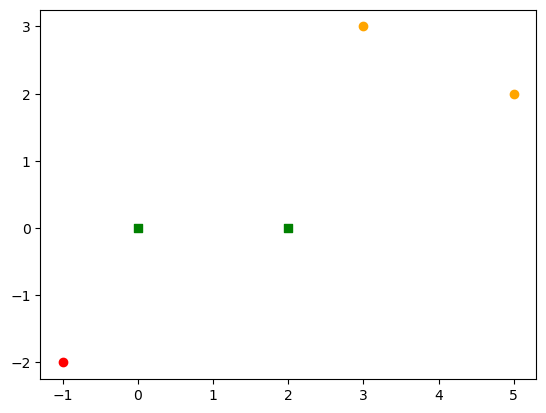

In [11]:
# Plot

# Regroupement des points par cluster
cluster = [[], []]

for i in range(len(p)):
    print(assign(p[i], c))
    cluster[assign(p[i], c)[1]].append(p[i])


cluster_1 = np.array(cluster[0])
cluster_2 = np.array(cluster[1])


# Tracer le cluster 1 en rouge
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='red')

# Tracer le cluster 2 en orange
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color='orange')

plt.scatter(c[:, 0], c[:, 1], c='green', marker='s')
plt.show()

[1 1 0]


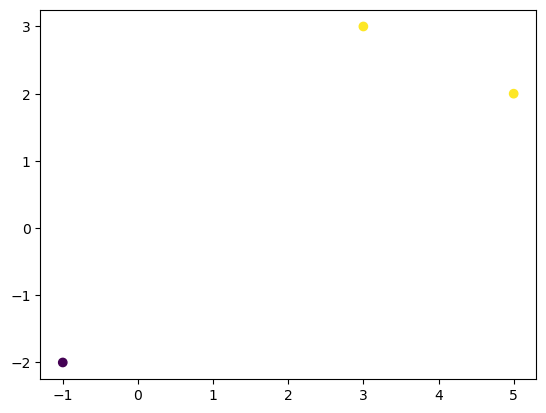

In [12]:
# Avec la librairie sklearn_som

from sklearn_som.som import SOM

som = SOM(m=1, n=2,
          dim=2)  # m = nombre de lignes, n = nombre de colonnes, dim = nombre de dimensions => 1 ligne, 2 colonnes, 2 dimensions => 2 neurones => 2 clusters

som.fit(p)

print(som.predict(p))

plt.scatter(p[:, 0], p[:, 1],
            c=som.predict(p))  # Affichage des points avec la prédiction du SOM s'ils font partie du cluster 0 ou 1

## Question 2

In [13]:
# Create data 20 random points

import numpy as np

data = np.random.rand(20, 2)
print(data)

[[0.98901276 0.04456817]
 [0.28725973 0.55419408]
 [0.24044918 0.29573673]
 [0.64279993 0.3272192 ]
 [0.68592133 0.06933291]
 [0.91441619 0.13358706]
 [0.20718008 0.7373724 ]
 [0.2362876  0.54446945]
 [0.03683511 0.07575365]
 [0.67196276 0.74876794]
 [0.23527116 0.42627803]
 [0.48810157 0.87751629]
 [0.30605637 0.75884081]
 [0.54139754 0.08506861]
 [0.95580219 0.5996051 ]
 [0.87514529 0.09506629]
 [0.01643793 0.42977585]
 [0.71998986 0.88206423]
 [0.42417461 0.89092469]
 [0.81753441 0.44777718]]


[0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0]


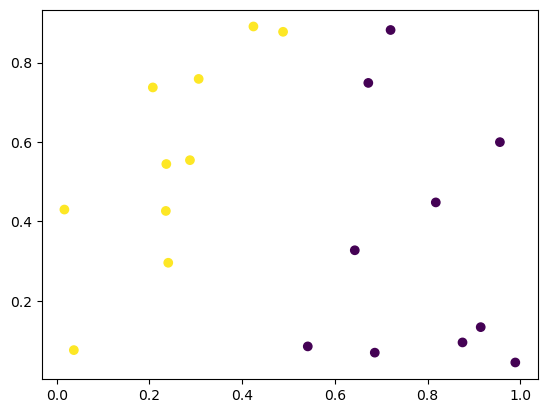

In [14]:
## Application du SOM

som = SOM(m=1, n=2,
          dim=2)  # m = nombre de lignes, n = nombre de colonnes, dim = nombre de dimensions => 1 ligne, 2 colonnes, 2 dimensions => 2 neurones => 2 clusters

som.fit(data)

print(som.predict(data))

plt.scatter(data[:, 0], data[:, 1],
            c=som.predict(data))  # Affichage des points avec la prédiction du SOM s'ils font partie du cluster 0 ou 1